# Exploratory Data Analysis (EDA) with UK Inflation Data

In this Jupyter Notebook, I'm will perform an Exploratory Data Analysis (EDA) using the Kaggle dataset of UK Inflation Data from 1989 to 2022. This dataset provides valuable insights into the inflation trends in the United Kingdom over the past three decades, making it an ideal resource for analyzing and visualizing economic data.

You can access the dataset on Kaggle [here](https://www.kaggle.com/datasets/scarfsman/uk-inflation-data-1989-2022).

Let's begin by importing the necessary libraries and loading the dataset for our analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("Inflation by Month.csv")

In [3]:
data.head()

,Year,Month,Inflation
0,1989,JAN,5.7
1,1989,FEB,5.8
2,1989,MAR,5.9
3,1989,APR,5.6
4,1989,MAY,5.9


In [4]:
data.tail()

,Year,Month,Inflation
410,2023,MAR,8.9
411,2023,APR,7.8
412,2023,MAY,7.9
413,2023,JUN,7.3
414,2023,JUL,6.4


In [5]:
data.shape

(415, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       415 non-null    int64  
 1   Month      415 non-null    object 
 2   Inflation  415 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [7]:
data.describe()

,Year,Inflation
count,415.000000,415.00000
mean,2005.795181,2.83759
std,9.997293,2.05346
min,1989.000000,0.20000
25%,1997.000000,1.60000
50%,2006.000000,2.30000
75%,2014.000000,3.00000
max,2023.000000,9.60000


In [8]:
data.columns

Index(['Year', 'Month', 'Inflation'], dtype='object')

In [9]:
data.nunique()

Year         35
Month        12
Inflation    72
dtype: int64

In [10]:
data['Inflation'].unique()

array([5.7, 5.8, 5.9, 5.6, 5.5, 6.3, 6.2, 7.7, 8.2, 8.9, 9.2, 8.6, 8.3,
       8. , 7.5, 6.9, 6.5, 5.2, 5.1, 4.6, 4.5, 3.7, 3.5, 3.3, 3.2, 3. ,
       3.1, 2.6, 2.3, 2.2, 2.7, 2.4, 2.1, 1.9, 1.8, 2.8, 2.9, 1.7, 1.6,
       2. , 1.5, 1.2, 1. , 0.9, 1.3, 1.4, 1.1, 2.5, 4.2, 4.4, 4.8, 3.8,
       3.4, 3.6, 3.9, 4.3, 4.1, 0.7, 0.5, 0.4, 0.3, 0.2, 0.6, 0.8, 4.9,
       7.8, 7.9, 8.8, 9.6, 9.3, 7.3, 6.4])

In [11]:
data.isna()

,Year,Month,Inflation
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
410,False,False,False
411,False,False,False
412,False,False,False
413,False,False,False


In [12]:
# Identify non-numeric values in the "Month" column
non_numeric_months = data[~data['Month'].str.isnumeric()]

# Display the unique non-numeric values
print(non_numeric_months['Month'].unique())


['JAN' 'FEB' 'MAR' 'APR' 'MAY' 'JUN' 'JUL' 'AUG' 'SEP' 'OCT' 'NOV' 'DEC']


In [13]:
# Keep the "Month" column as categorical
data['Month'] = data['Month'].astype('category')

# Verify the data types after conversion
data.dtypes


Year            int64
Month        category
Inflation     float64
dtype: object

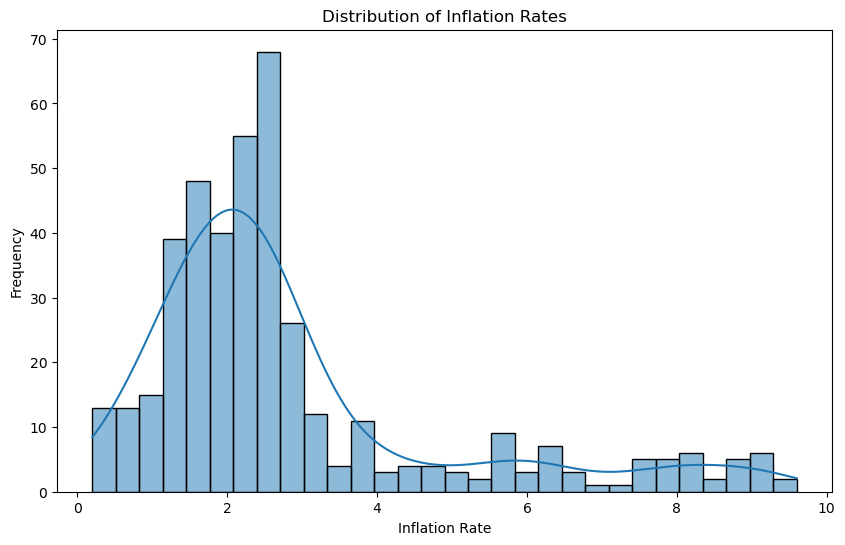

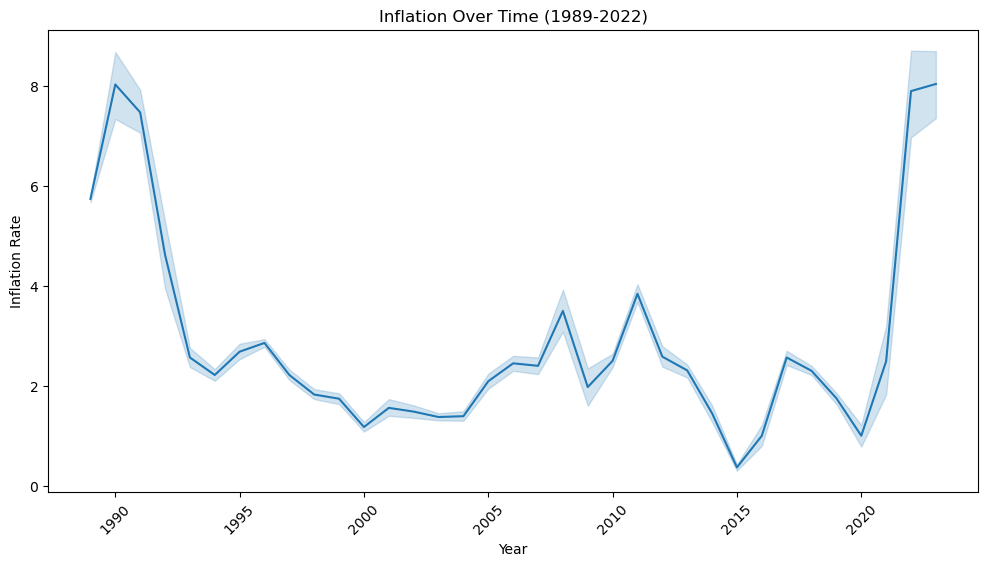

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Inflation'], bins=30, kde=True)
plt.title('Distribution of Inflation Rates')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.show()

# Time Series Analysis - Inflation Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Inflation', data=data)
plt.title('Inflation Over Time (1989-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45)
plt.show()


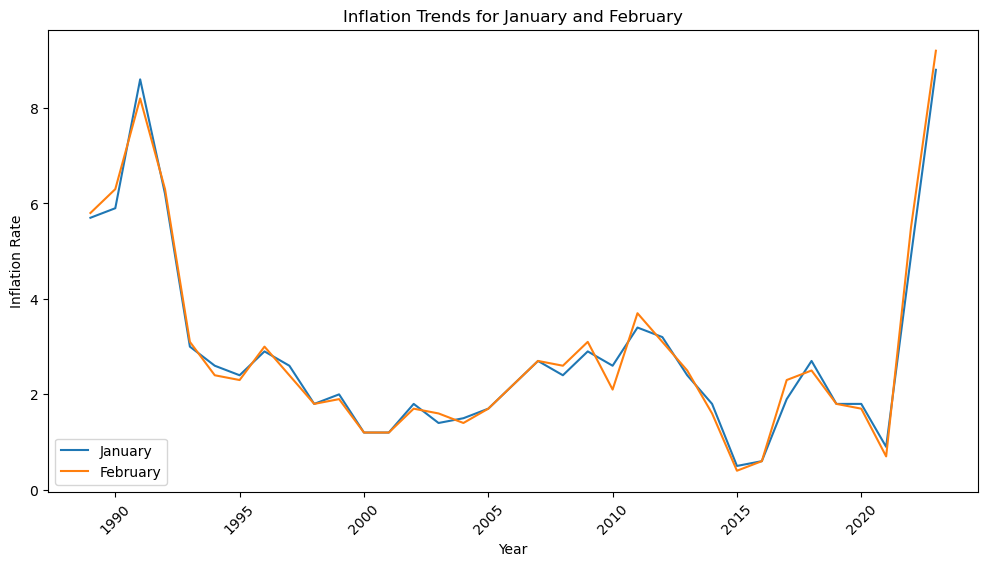

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (if not already loaded)
# data = pd.read_csv("Inflation by Month.csv")

# Convert the "Month" column to a datetime object for time-based analysis
data['Month'] = pd.to_datetime(data['Month'], format='%b')

# Extract specific months for analysis (e.g., January and February)
january_data = data[data['Month'].dt.month == 1]  # Filter for January
february_data = data[data['Month'].dt.month == 2]  # Filter for February

# Plot inflation trends for specific months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Inflation', data=january_data, label='January')
sns.lineplot(x='Year', y='Inflation', data=february_data, label='February')
plt.title('Inflation Trends for January and February')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45)
plt.legend()
plt.show()

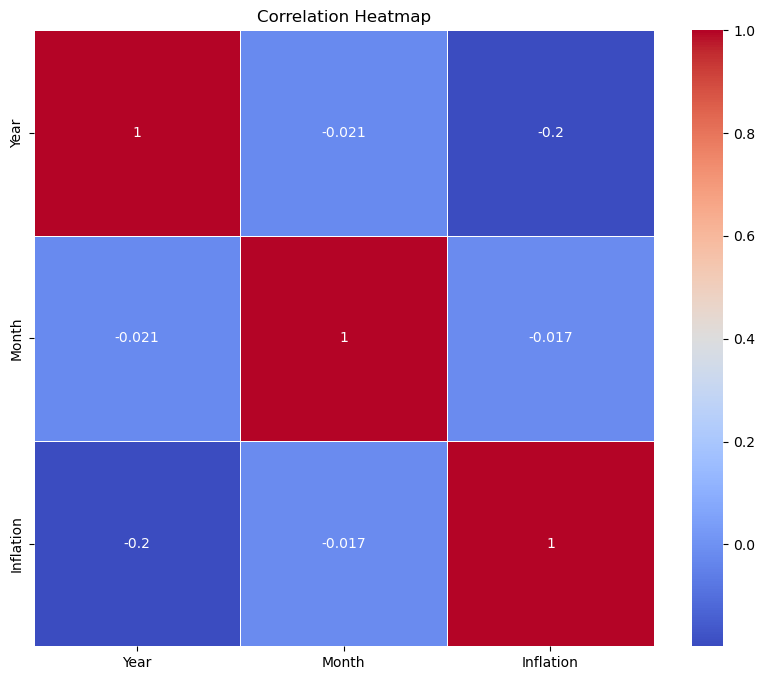

C:\Users\Haider\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


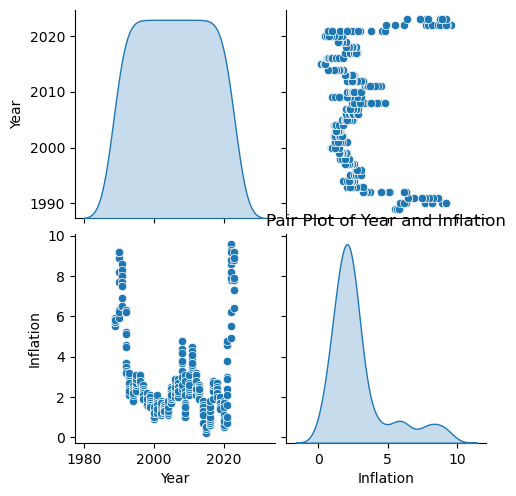

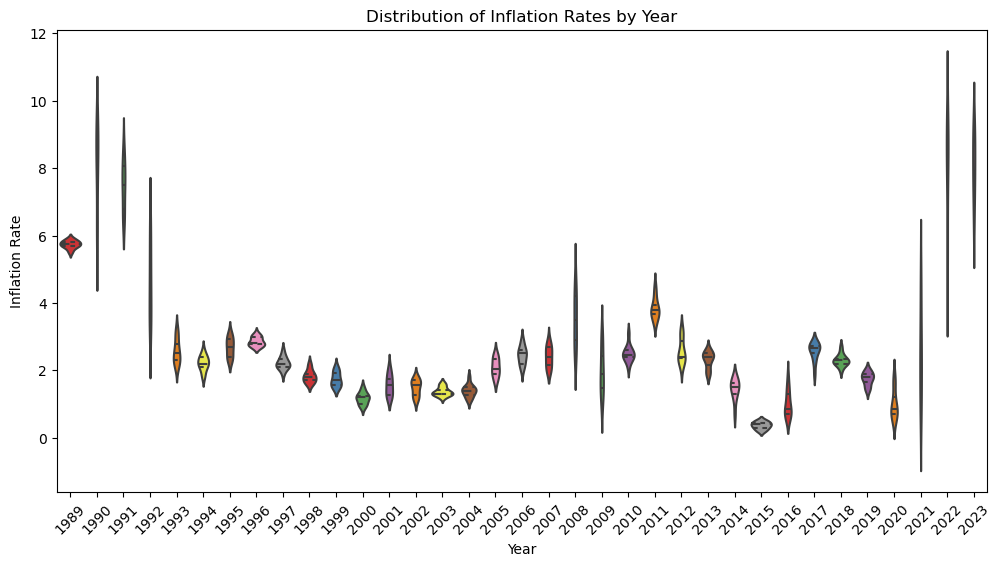

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (if not already loaded)
# data = pd.read_csv("Inflation by Month.csv")

# Heatmap to visualize correlations between numerical variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pair plot to visualize pairwise relationships between numerical variables
sns.pairplot(data[['Year', 'Inflation']], diag_kind='kde')
plt.title('Pair Plot of Year and Inflation')
plt.show()

# Violin plot to visualize the distribution of inflation rates by year
plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Inflation', data=data, palette='Set1', inner='quart')
plt.title('Distribution of Inflation Rates by Year')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45)
plt.show()
